## NAME : Shweta Khanjan Shroff

## TOPIC:
### A study of correlation between name, prices (high and low), prices (opening and closing) and trade volume of the stocks for the years 2013-2018.--- (Clustering-Unsupervised Learning) and (Regression-Supervised Learning) for advising the investor on the basis of studied trends.



The dataset contains historical stock prices(last 5 years from the date of upload, i.e., 2018) for all companies currently found on the S&P 500 index.

AIM :

The aim of this project is to draw conclusion about/ find a correlation beteween volume of stocks traded  and factors such as stock name, price(high/low) and opening price of the stock. It is to check if we can predict high/low volume of stocks traded based off these factors, based on this study using both clustering and regression techniques. The results of this study can be used both from an academic standpoint, to find correlation between different stock attributes as well as to counsel investors, market analysts and observers for careful investment practices.

	--The project aims to find hidden patterns in the unlabeled data, to capture paradigms that lead to high/low trade volume of stocks of all companies currently found on the S&P 500 index for the years(2013 – 2018). I have make use of all the valid data from dataset(barring NaN values). I have  used Clustering technique, (K-Means Clustering) which is Unsupervised learning, a technique of learning about data by observing hidden correlations between data points. 
 
	--I have done further exploration by using Supervised Learning, (Linear Regression) to find if we can predict stock trade volumes to counsel our clients, where trade volume of stocks is the labeled data and names of stocks, high price, low price and  opening price  are the attributes of the stocks, used to study the factors affecting trade volumes. 


DATA SOURCE: 

    Kaggle, “S&P 500 stock data”

DATA FILE URL : 

   Kaggle : https://www.kaggle.com/camnugent/sandp500 
    
     OR 
  
  Google drive : https://drive.google.com/file/d/1r9mU2pb_fTA4VCGHGZP5mn3zrnqNsK29/view?usp=sharing
    
    
Filename  :  all_stocks_5yr.csv 

### APPROACH: 

   I have used clustering (Unsupervised Learning) as the means of preliminary analysis of this unlabeled data to study the trends, if any, to check the behavior of stocks on a particular day. 
    Clustering plays an important role to draw insights from unlabeled data. It classifies the data in similar groups which improves various business decisions by providing a meta understanding.
    Once the trend is observed using clustering, I have used data from clustering to further check my results using techniques including regression,(Supervised Learning) and provide advice to potential investors, or stock-market analysts, if any.

In [52]:
#Import of all required python modules

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

1. The input data is as above, and we read it into a DataFrame and print the size and first 10 lines of the DataFrame.

In [53]:
stock_data = pd.read_csv('all_stocks_5yr.csv')
print(stock_data .shape)
stock_data.head(10)

(619040, 7)


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL


2. We remove any NaN values, so as to work with only valid data.

In [54]:
stock_data.dropna(inplace=True)
stock_data

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


3. We find basic statistics on the data (mean, standard devision, min, max, quartile of each feature or column) to get the range of data we want to work with.

In [55]:
stock_data.describe()

,open,high,low,close,volume
count,619029.000000,619029.000000,619029.000000,619029.000000,6.190290e+05
mean,83.023334,83.778419,82.256200,83.043305,4.321892e+06
std,97.378769,98.207735,96.507634,97.388913,8.693671e+06
min,1.620000,1.690000,1.500000,1.590000,1.010000e+02
25%,40.220000,40.620000,39.830000,40.240800,1.070351e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082165e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284550e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


4. Since we're interested in the general attribute of stocks, we create a new DataFrame called data that's easier to work with. We drop some columns to focus on important aspects of the stock data only. For this purpose,the columns we want to be left with are the prices(high, low), the volume(of trade) and Names of stocks. We drop the rest of the columns. 

In [56]:
data=stock_data.drop(columns=['date','open','close'])
data

,high,low,volume,Name
0,15.12,14.63,8407500,AAL
1,15.01,14.26,8882000,AAL
2,14.51,14.10,8126000,AAL
3,14.94,14.25,10259500,AAL
4,14.96,13.16,31879900,AAL
...,...,...,...,...
619035,78.27,76.69,2982259,ZTS
619036,78.12,76.73,2595187,ZTS
619037,76.92,73.18,2962031,ZTS
619038,74.56,72.13,4924323,ZTS


DATA EXPLORATION:

	• The dataset has 619040 entries and 7 columns, out of which I shall be using 619029 entries(after removing rows with NaN values.The data has stocks' transaction date,opening price, closing price, high price, low price,volume, and Name. The volume(volume of stocks traded) is important to the stock market and the investors, because it shows how often the stocks of a certain type are traded the most. We want to see if there is a stock attribute that's associated with a higher trade volume.Pairplots were drawn between the columns using seaborn library.
        
	• After looking at the pairplot of all columns, I have selected to study the correlation between high & volume, low & volume, Name & volume. After dropping 3 columns (date, open, close) that clearly do not have as much correlation with volume, we will use Clustering to find out if those stocks with highest trade volumes have any common attributes like price(open, high, low,close) or name. 
 
	• The dataset is very large, and it should be sufficient to draw conclusion about the factors affecting trade volumes of stocks.

         

5. In order to work with data smoothly and carry out clustering of the data, all data need to be numeric values, in order to be supported by the K-Means Clustering from Scikit-learn module. We convert all qualitative data into quantitative data. Here we change the names of the stocks into numbers.

In [57]:
# change the Name to a number
name = data.Name.unique()
num = [count for count in range(len(name))]
Name=dict(zip(name,num))
data.replace(Name,inplace=True)
data

,high,low,volume,Name
0,15.12,14.63,8407500,0
1,15.01,14.26,8882000,0
2,14.51,14.10,8126000,0
3,14.94,14.25,10259500,0
4,14.96,13.16,31879900,0
...,...,...,...,...
619035,78.27,76.69,2982259,504
619036,78.12,76.73,2595187,504
619037,76.92,73.18,2962031,504
619038,74.56,72.13,4924323,504


6. To observe some general trends amongst the data elements themselves, and to get some preliminary idea of the attributes of the stocks, we first begin by plotting the bar chart of the stocks, grouped by 'Name' and the sum of 'volume'.

Name
0      11822414547
1      68046305767
2       1357256410
3       9909189476
4       2525224549
          ...     
500     1489574691
501     4040170774
502     1633103868
503     3300062992
504     4635485010
Name: volume, Length: 505, dtype: int64

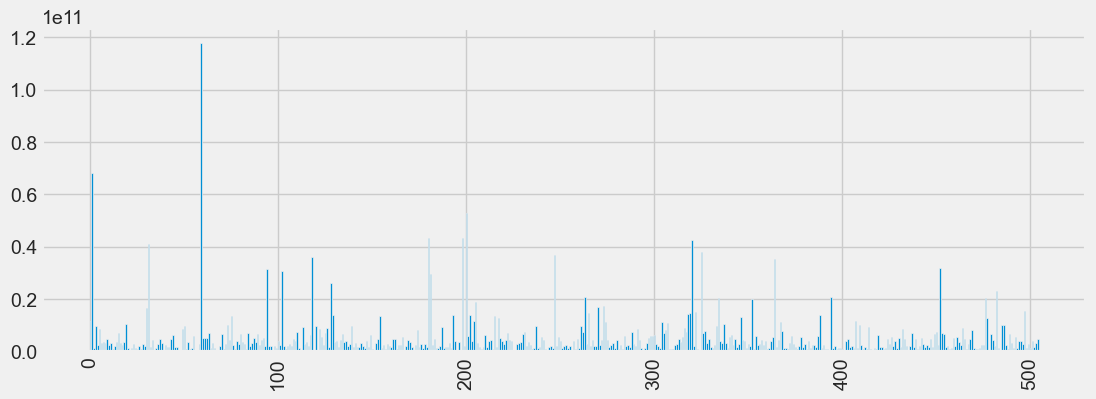

In [58]:
fig = plt.figure(figsize=(12,4))
plotD = data.groupby("Name")['volume'].sum()
plt.bar(plotD.index, plotD)
plt.xticks(rotation='vertical')
plotD

An overall glance gives us the the idea that there is not too much of a distinct correlation 
between the stock names and volume.We only observe some occasional spikes in the bar graph, 
 indicating a very mild correlation between name of the stock and trade volume.

7. Next, let's view the distribution of the 'high', 'low' and 'volume' columns.
In what range do the 'low' of the stock prices generally lie? What about the 'high' 
of the stock prices?  Is the trade 'volume' a normal or Gaussian distribution? We draw histograms for the study of the same.
 

Text(0.5, 0, 'Volume')

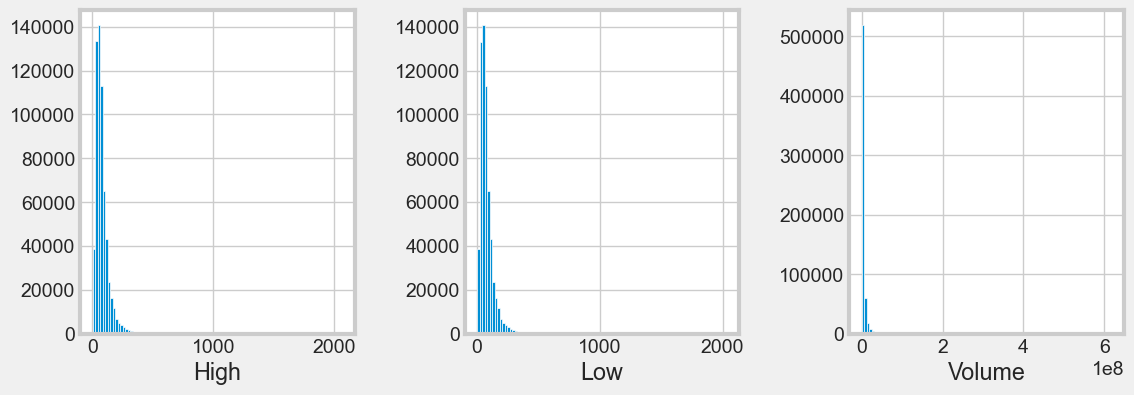

In [59]:
fig = plt.figure(figsize=(12,4))
sns.set_style("whitegrid")
plt.subplot(1,3,1)   # 1 row, 3 cols, subplot 1
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.hist(data['high'],bins=100)
plt.xlabel("High")
plt.subplot(1,3,2)   # 1 row, 3 cols, subplot 1
plt.hist(data['low'],bins=100)
plt.xlabel("Low")
plt.subplot(1,3,3)   # 1 row, 3 cols, subplot 1
plt.hist(data['volume'],bins=100)
plt.xlabel("Volume")

 We observe that most of the 'high' values of stocks are in the range of around 0-150. Thus, the high
 prices for most of the stocks lie below 200.
 Similarly for 'low' prices of stocks, most of the stocks traded have a 'low' value of less than 200.
 All of the stocks traded('volume') are within the range of 0.5 x 10^8 .The 'volume' is not a normal
 distribution, and is highly skewed towards the lower range.There is a shift toward the left side.(Positively skewewd)

8. A pairplot gives a bird's-eye view of correlation between the individual attributes(numerical)
and we can observe the correlation between the attributes like 'high','low' with 'volume', right away, over here.

/Users/sk/Documents/anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sk/Documents/anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sk/Documents/anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sk/Documents/anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

<Figure size 1200x400 with 0 Axes>

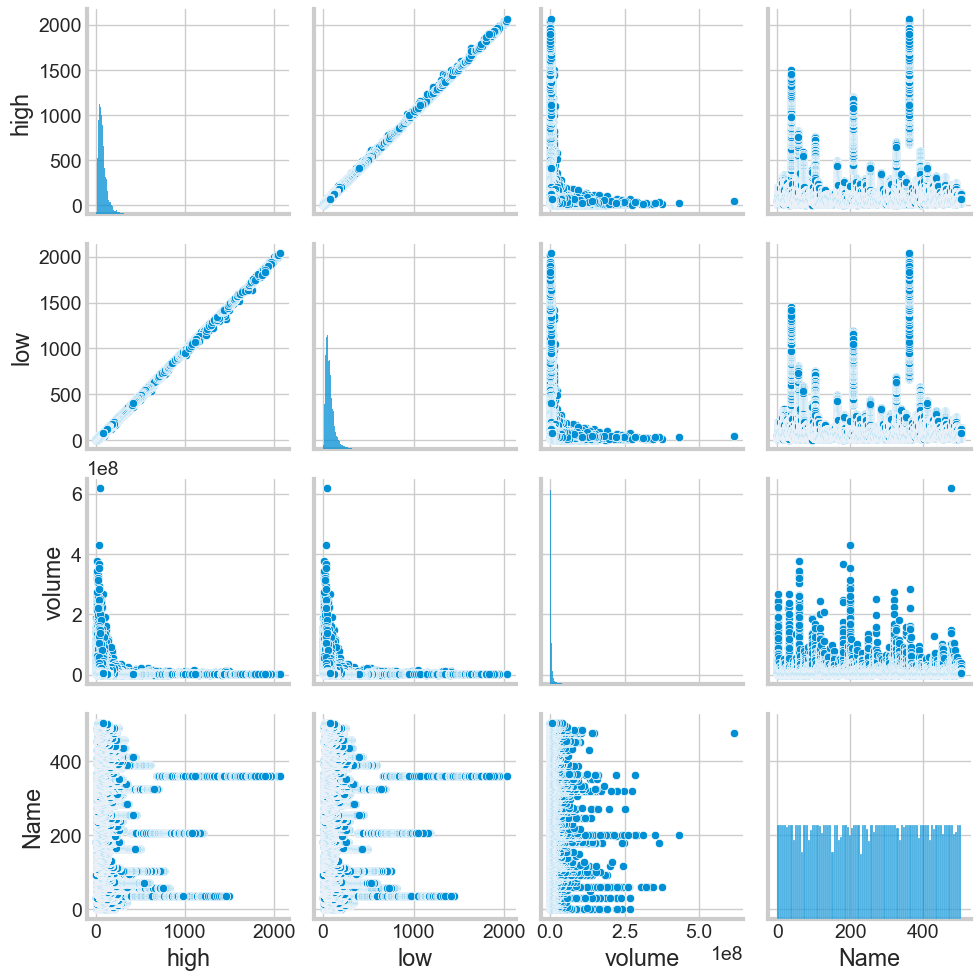

In [60]:
fig = plt.figure(figsize=(12,4))
sns.pairplot(data)

Looking at the trends we observe that for the 'high'and the 'low' prices of the stocks,there is very 
little correlation with volume. There seems to be some correlation with volume, at lower value ranges, but hardly any at higher range of 'low' and 'high' values.

There seems to be a perfect correlation between 'high' and 'low'stock prices, meaning that those 
 stocks that have low 'high' prices of stocks also have a low 'low' prices, and vice-versa.

Name of the stocks also do not seem to have much correlation with either volume, high or low,as the
values seem to be all over the place.

9. We are going to use K-Means Clustering algorithm for data clustering.First we see if Name has any effect on volume.

K-MEANS CLUSTERING ALGORITHM

In [61]:
X = data.drop(columns=['high','low'])
print(X.columns.values)

['volume' 'Name']


10. We draw the 'Elbow-curve' in order to determine the optimal k-value. 

/Users/sk/Documents/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sk/Documents/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sk/Documents/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sk/Documents/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

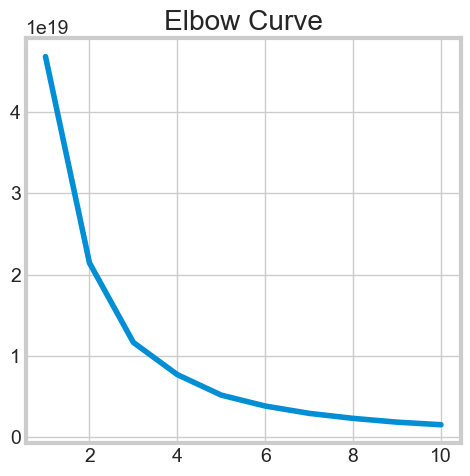

In [62]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(1,11),wcss)
plt.title('Elbow Curve')
plt.show() 

11.From the above plot, we use the optimal k-value to create the model, train and test the model.
Using the k-means output, we plot Name vs. volume

/Users/sk/Documents/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


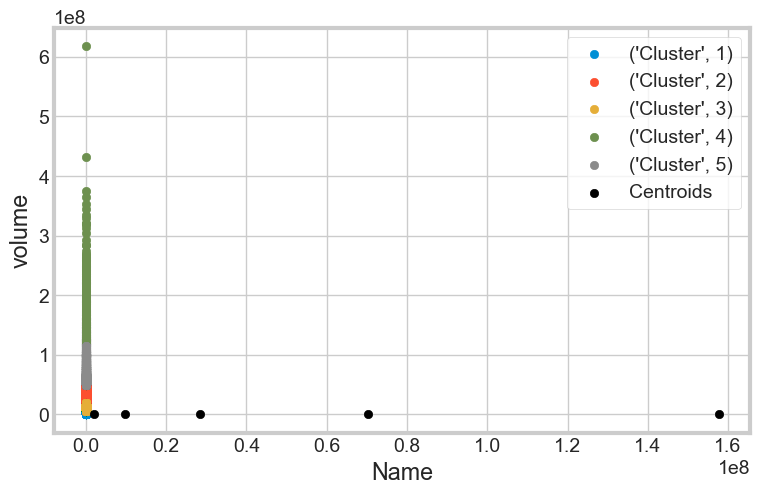

In [63]:
# k = 5

kmeans=KMeans(n_clusters=5,init='k-means++')
kmeans.fit(X)
y_kmeans=kmeans.predict(X)

fig = plt.figure(figsize=(8,5))
for i in range(5):
    plt.scatter(X[y_kmeans == i].Name, X[y_kmeans == i].volume, label = ('Cluster', i+1))

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'black', label = 'Centroids')
plt.xlabel('Name')
plt.ylabel('volume')
plt.legend()
plt.show()

Name has practically no impact on volume.

12. Next we see if 'low' has an effect on the 'volume'.

In [64]:
X = data.drop(columns=['high','Name'])
print(X.columns.values)

['low' 'volume']


13.Similar to above procedure we find the optimal k-value by drawing the 'Elbow-curve' for 'low' and 
'volume'.

/Users/sk/Documents/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sk/Documents/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sk/Documents/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sk/Documents/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

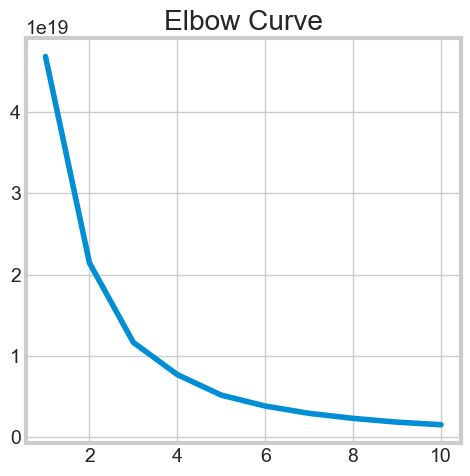

In [65]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(1,11),wcss)
plt.title('Elbow Curve')
plt.show() 

14.From the above plot, we use the optimal k-value to create the model, train and test the model. Using the k-means output, we draw a scatterplot for low vs. volume

/Users/sk/Documents/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


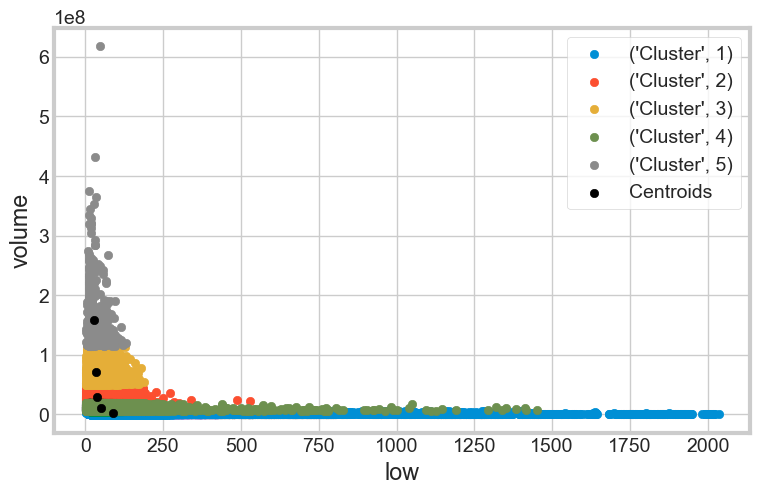

In [66]:
#k=5
kmeans=KMeans(n_clusters=5,init='k-means++')
kmeans.fit(X)
y_kmeans=kmeans.predict(X)

fig = plt.figure(figsize=(8,5))
for i in range(5):
    plt.scatter(X[y_kmeans == i].low, X[y_kmeans == i].volume, label = ('Cluster', i+1))


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'black', label = 'Centroids')
plt.xlabel('low')
plt.ylabel('volume')
plt.legend()
plt.show()

In [67]:
# The data has been divided into distinct clusters, and 'low' also seem to have practically no correlation with the 'volume' of stocks traded. 
# Most of the 'volume' is concentrated at low 'low' values, but still no distinct correlation can be found.

15. Next we see if 'high' has an effect on the 'volume'.

In [68]:
X = data.drop(columns=['low','Name'])
print(X.columns.values)

['high' 'volume']


16. The optimal k-value is found and a scatterplot is drawn.

/Users/sk/Documents/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sk/Documents/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sk/Documents/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sk/Documents/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

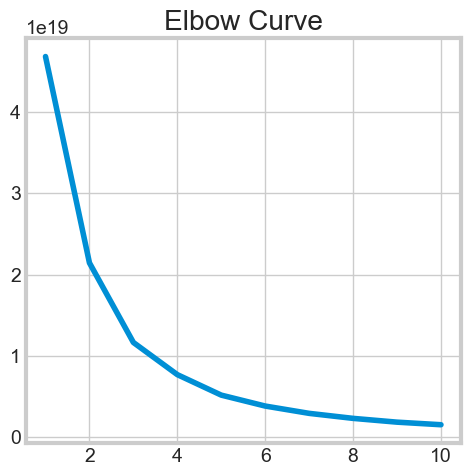

In [69]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(1,11),wcss)
plt.title('Elbow Curve')
plt.show()

/Users/sk/Documents/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


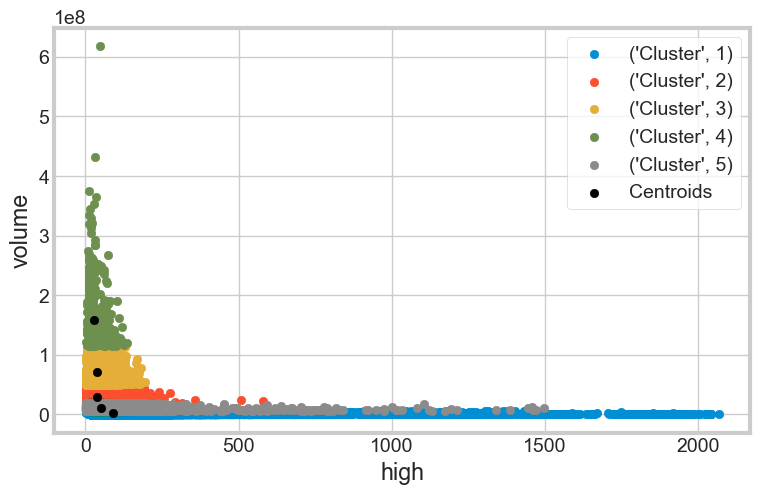

In [70]:
#k =5
kmeans=KMeans(n_clusters=5,init='k-means++')
kmeans.fit(X)
y_kmeans=kmeans.predict(X)

fig = plt.figure(figsize=(8,5))
for i in range(5):
    plt.scatter(X[y_kmeans == i].high, X[y_kmeans == i].volume, label = ('Cluster', i+1))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'black', label = 'Centroids')
plt.xlabel('high')
plt.ylabel('volume')
plt.legend()
plt.show()

In [71]:
# The trend that emerges for 'high' is exactly similar to that observed for 'low'.

# The data has been divided into distinct clusters, and 'high' also seem to have
# practically no correlation with the 'volume' of stocks traded. Most of the 'volume' is concentrated 
# at low 'high' values, but still no distinct correlation can be found.

17. Similar to the above plots, we now find 'Elbow-curve' for finding optimal k- value for plotting
'low' vs. 'high' vs. 'volume'.
 As the names of stocks have no effect on the volume, we drop the column 'Name' 

    high    low    volume
0  15.12  14.63   8407500
1  15.01  14.26   8882000
2  14.51  14.10   8126000
3  14.94  14.25  10259500
4  14.96  13.16  31879900


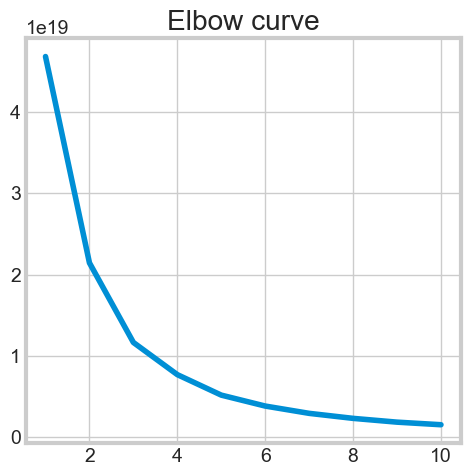

In [72]:
X = data.drop(columns=['Name'])
print(X.head())
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(1,11),wcss)
plt.title('Elbow curve')
plt.show() 

18. We draw a 3D scatterplot showing the clusters for 'low','high' and 'volume'.

/Users/sk/Documents/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


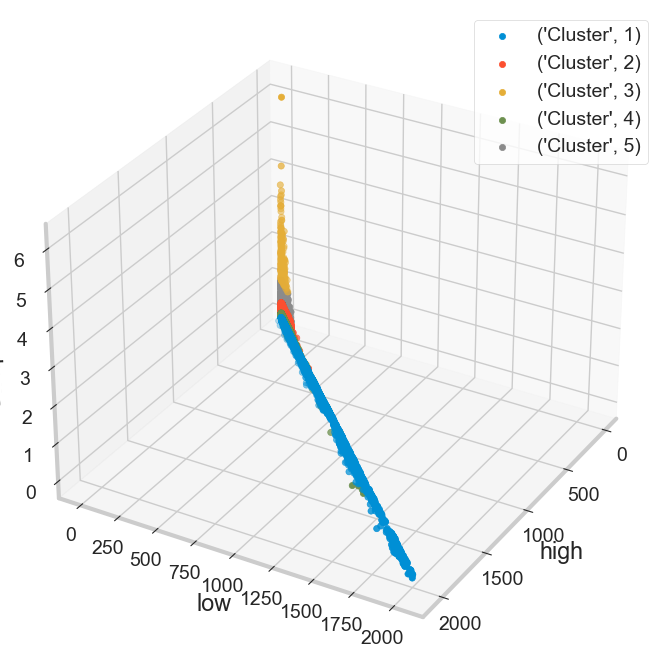

In [73]:
#k = 5

kmeans=KMeans(n_clusters=5,init='k-means++')
kmeans.fit(X)
y_kmeans=kmeans.predict(X)


fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
for i in range(5):
    ax.scatter(X.high[y_kmeans == i], X.low[y_kmeans == i], X.volume[y_kmeans == i], label = ('Cluster', i+1))
plt.xlabel('high')
plt.ylabel('low')
ax.set_zlabel('volume')
ax.view_init(30,30) 
plt.legend()
plt.show()

We draw more plots from different angles

/Users/sk/Documents/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


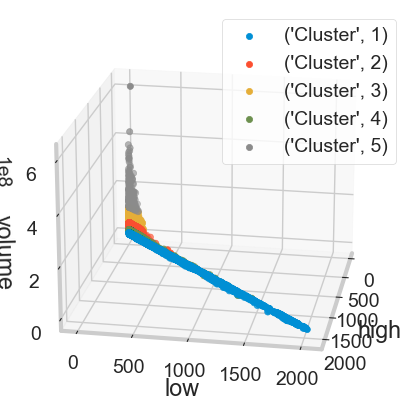

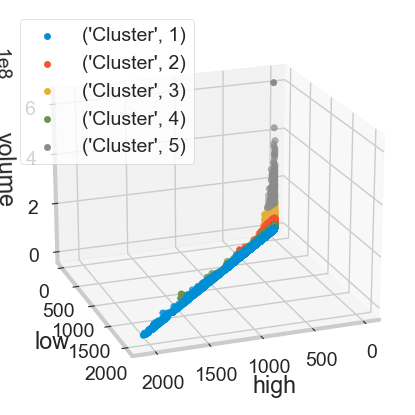

In [74]:
#k = 5

kmeans=KMeans(n_clusters=5,init='k-means++')
kmeans.fit(X)
y_kmeans=kmeans.predict(X)


fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(121, projection='3d')
for i in range(5):
    ax.scatter(X.high[y_kmeans == i], X.low[y_kmeans == i], X.volume[y_kmeans == i], label = ('Cluster', i+1))
plt.xlabel('high')
plt.ylabel('low')
ax.set_zlabel('volume')
ax.view_init(20,10) # we change the angles to get different views.
plt.legend()
plt.show()

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(122, projection='3d')
for i in range(5):
    ax.scatter(X.high[y_kmeans == i], X.low[y_kmeans == i], X.volume[y_kmeans == i], label = ('Cluster', i+1))
plt.xlabel('high')
plt.ylabel('low')
ax.set_zlabel('volume')
ax.view_init(20,70) # we change the angles to get different views.
plt.legend()
plt.show()

19. We will now analyze the scatterplot showing the clusters and check for the different attributes of the stocks having the highest trade volume.We see the cluster that has the stocks with the highest 'volume' values, and we can check the attributes of this cluster by mapping the values from the cluster data onto a DataFrame. We check if shows with high volumes share any price (high,low,open or close) or name attributes.

In [75]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = X.index.values
cluster_map['cluster'] = y_kmeans

In [76]:
cluster_map[cluster_map.cluster == 4] # Cluster that corresponds to the highest trade volume.
ind = cluster_map[cluster_map.cluster == 4].data_index.values #index values for the cluster 
new_data=stock_data.loc[ind] #DataFrame containing data from stock_data with index values for the cluster 
new_data

,date,open,high,low,close,volume,Name
531,2015-03-20,55.1900,56.0500,54.8600,55.7600,137767165,AAL
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
...,...,...,...,...,...,...,...
449792,2016-09-30,88.3000,90.2200,88.2900,89.7500,123735748,PG
527437,2015-11-17,30.3900,31.3600,30.3000,30.5800,128981940,SYF
584118,2014-02-24,47.0200,47.2000,46.2300,46.2300,618237630,VZ
584119,2014-02-25,46.4200,46.7600,46.1900,46.2900,146504915,VZ


20. This new Dataframe new_data is the set of data that emerged as the one having the largest values for 'volume' and we will now use this data to analyze further and use this DataFrame for all our  further investigations to look for common attributes, if any, in terms of low,high,close and open prices, and name attibutes.  We find basic statistics on the obtained data (mean, standard devision, min, max, quartile of each feature or column)

In [77]:
new_data.loc[ind].describe()

,open,high,low,close,volume
count,527.000000,527.000000,527.000000,527.000000,5.270000e+02
mean,27.040908,27.498078,26.524003,26.989781,1.576584e+08
std,21.957000,22.305683,21.522620,21.852250,5.077462e+07
min,2.560000,2.590000,1.500000,2.040000,1.141366e+08
25%,13.505000,13.730000,13.230000,13.410000,1.243745e+08
50%,16.690000,16.880000,16.450000,16.680000,1.417830e+08
75%,30.040000,30.675000,29.790000,30.270000,1.714938e+08
max,134.455000,134.540000,129.570000,130.560000,6.182376e+08


21. Now we check for stock names of top 10 most traded stocks and draw a bar chart and a bar chart on a polar axis for it.

/var/folders/n8/z46rvc_x7jsc8cqld3kw7dk40000gr/T/ipykernel_3402/2600805500.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  l1.append(a.volume[i])


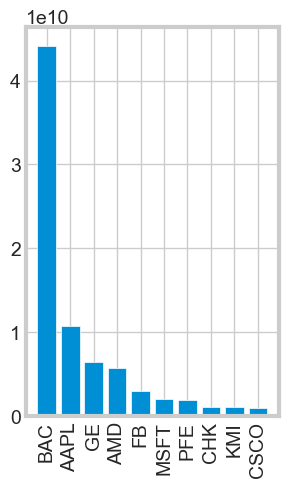

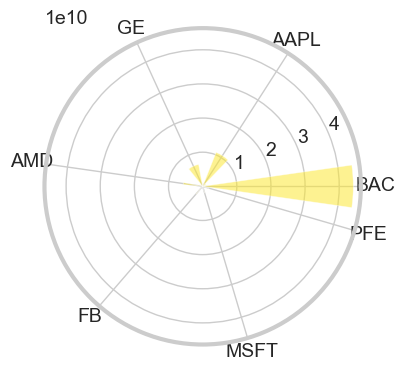

,date,open,high,low,close,volume
Name,,,,,,
BAC,2013-02-082013-02-122013-02-132013-02-142013-0...,4527.1949,4591.2589,4459.6561,4527.4750,44130964732
AAPL,2013-02-082013-02-112013-02-122013-02-132013-0...,5247.6124,5328.3787,5158.3482,5236.2139,10693642602
GE,2015-04-102015-04-132015-10-162015-10-192015-1...,830.3400,845.6700,817.4151,831.6200,6503025334
AMD,2013-07-192014-07-152014-07-182016-04-222016-0...,419.1450,435.5055,401.7948,418.8100,5685339913
FB,2013-07-252013-07-262013-07-292013-07-302013-0...,955.4000,975.5600,925.5570,948.8300,3006567338
MSFT,2013-04-112013-04-222013-07-192013-08-232013-0...,518.4000,527.0147,510.4950,519.5200,2053867145
PFE,2013-06-172013-06-182013-06-192013-06-212013-0...,357.1100,361.4850,351.1000,355.7500,1950612942
CHK,2016-02-082016-03-032016-03-042016-03-072016-0...,41.4900,45.7600,38.7400,42.6000,1122251367
KMI,2014-08-112014-11-262015-12-042015-12-072015-1...,149.1600,154.0000,140.9300,147.4600,1037264014


In [78]:
a=new_data.groupby('Name').sum().sort_values(by='volume',ascending=False)
l1 = []
l2 = []
for i in range(0,10):
    l1.append(a.volume[i])
    l2.append(a.index[i])
d=dict(zip(l2,l1))

# Bar chart
plt.subplot(1,2,1)
plt.bar(l2,l1)
plt.xticks(rotation=90)
plt.show()


# Bar chart on a polar axis
# Compute pie slices
fig = plt.figure(figsize=(8,6))
N = len(l2)
theta = np.array(l2)
radii = np.array(l1)
width = np.pi /5* np.random.rand(N)
colors = plt.cm.viridis(radii / 5.)

ax = plt.subplot(1,2,2, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

a

BAC emerges as the clear winner,this time,for clustering in this particular run of the program. Most of the highly traded stocks are for BAC. Other than that, there is NO SIGNIFICANT TREND AVAILABLE. Let us CHECK ATTRIBUTES of BAC to see if a particular trend can be captured, and we can check if any particular attribute is responsible for the high trade volumes.

We will check for both BAC, the stock with exceptionally high volume traded, and CSCO, stocks with a comparatively lower trade volume, among the high traders.

In [79]:
df = a.loc['BAC']
df

date      2013-02-082013-02-122013-02-132013-02-142013-0...
open                                              4527.1949
high                                              4591.2589
low                                               4459.6561
close                                              4527.475
volume                                          44130964732
Name: BAC, dtype: object

We notice that open, high,low,close -- all attributes have values in similar ranges, ~ 4000. So, no particular attribute stands out in particular.

In [80]:
dff = df = a.loc['CSCO']
dff

date      2013-05-162013-08-152013-11-142014-02-132014-0...
open                                                144.085
high                                                 147.05
low                                                 143.045
close                                               145.647
volume                                            967074093
Name: CSCO, dtype: object

Similar to BAC, we notice that open, high,low,close -- all attributes have values in similar ranges, ~ 4000. So, no particular attribute in particular seems to be affecting trade volumes.  

SINCE NO PARTICULAR TREND EMERGES after a careful study using CLUSTERING technique, we will check for trends using LINEAR REGRESSION technique by building a Regression model for prediction of volume of stocks traded. We will check if a paticular attribute contributes more towards HIGH TRADE VOLUMES of a stock.

22. We draw a lineplot to study the change of prices(open,high,low,close) vs. volume.

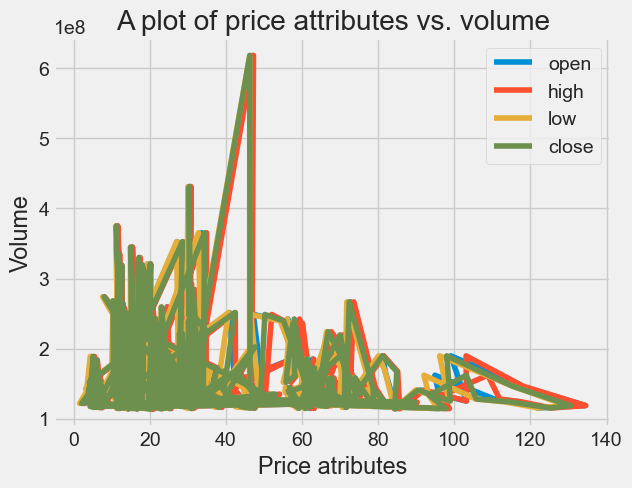

In [81]:
# lineplot 'fivethirtyeight' style
col_list = ['open','high','low','close']
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
for col in col_list :
    ax.plot(new_data[col],new_data.volume,label=col)
plt.title('A plot of price attributes vs. volume')
plt.xlabel('Price atributes')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [82]:
# It can be seen from above that all the four stock price attributes,('open','high','low','close')
# move simultaneously with each other and that as one increases the other increases and vice-versa. 
# thus, there is a positive correlation amongst them,with each other, and it shows no bearing on the
# volume of stocks traded.However, the graph is denser towards the lower values of price attributes, 
# reflecting little, though insignificant correlation.All that can be said here is that lower stock 
# prices are mildly favored over the higher prices.

23. We will futher check if the most traded stocks thus obtained above in new_data have any correlation with price(high, low, open or close) or name attributes, by the means of linear regression.Here we are essentially reducing the dataset and applying our algorithm on a restricted dataset,which we have taken from original dataset,as those stocks that have highest trade volumes. We check for correlation by drawing a linear regresion line, and the nature of slope 
of the regression line will indicate the correlation.

LINEAR REGRESSION MODEL

In [83]:
import sklearn.linear_model as lm

regr = lm.LinearRegression()

24. Checking for correlation of 'high' vs. 'volume'.

In [84]:
X = new_data[['high']]
y = new_data.volume
X

,high
531,56.0500
1259,68.4014
1260,69.2771
1261,68.9114
1262,67.6628
...,...
449792,90.2200
527437,31.3600
584118,47.2000
584119,46.7600


In [85]:
regr = regr.fit(X, y)
corr = regr.coef_
corr

array([-130893.78624843])

Text(0, 0.5, 'volume')

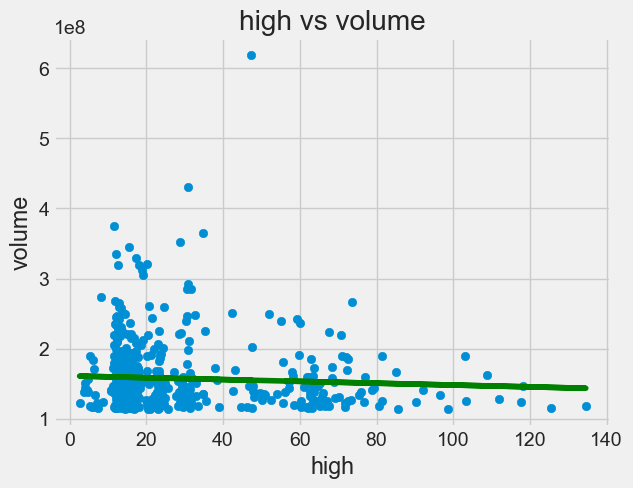

In [86]:
plt.plot(X, regr.coef_ * X + regr.intercept_, color='green')
plt.scatter(new_data.high,new_data.volume)    
plt.title("high vs volume")
plt.xlabel("high")
plt.ylabel("volume")

In [87]:
# Plot and regression line show that there is very little or no correlation. 

25. Checking for correlation of 'low' vs. 'volume'.

In [88]:
X = new_data[['low']]
y = new_data.volume
X

,low
531,54.8600
1259,66.8928
1260,67.6071
1261,66.8205
1262,66.1742
...,...
449792,88.2900
527437,30.3000
584118,46.2300
584119,46.1900


In [89]:
regr = regr.fit(X, y)
corr = regr.coef_
corr

array([-144943.05517342])

Text(0, 0.5, 'volume')

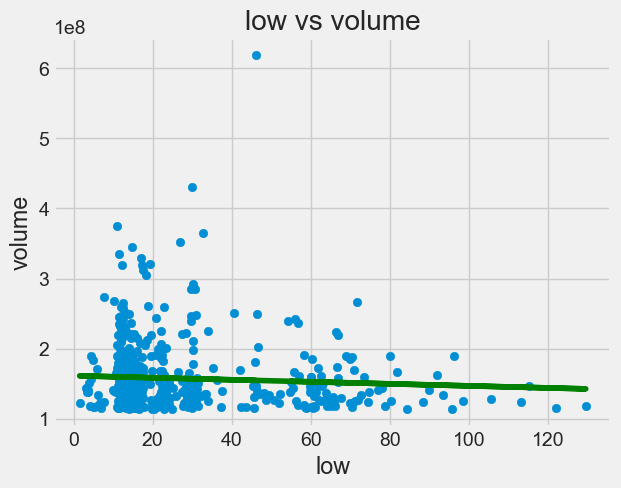

In [90]:
plt.plot(X, regr.coef_ * X + regr.intercept_, color='green')
plt.scatter(new_data.low,new_data.volume)    
plt.title("low vs volume")
plt.xlabel("low")
plt.ylabel("volume")

In [91]:
# Plot and regression line show that there is very little or no correlation. 

26. Checking for correlation of 'open' vs. 'volume'.

In [92]:
X = new_data[['open']]
y = new_data.volume
X

,open
531,55.1900
1259,67.7142
1260,68.0714
1261,68.5014
1262,66.7442
...,...
449792,88.3000
527437,30.3900
584118,47.0200
584119,46.4200


In [93]:
regr = regr.fit(X, y)
corr = regr.coef_
corr

array([-139061.26866195])

Text(0, 0.5, 'volume')

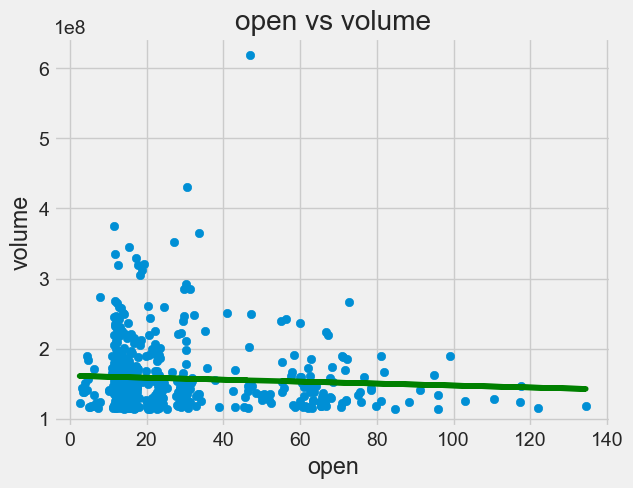

In [94]:
plt.plot(X, regr.coef_ * X + regr.intercept_, color='green')
plt.scatter(new_data.open,new_data.volume)    
plt.title("open vs volume")
plt.xlabel("open")
plt.ylabel("volume")


In [95]:
# Plot and regression line show that there is very little or no correlation. 

25. Checking for correlation of 'Name' vs. 'volume'. We need to change the string data into numerical data.

In [96]:
name = set(new_data.Name)
num  = [i for i in range(len(name))]
Name = dict(zip(name,num))
new_data.replace(Name,inplace=True)
new_data

,date,open,high,low,close,volume,Name
531,2015-03-20,55.1900,56.0500,54.8600,55.7600,137767165,9
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,10
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,10
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,10
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,10
...,...,...,...,...,...,...,...
449792,2016-09-30,88.3000,90.2200,88.2900,89.7500,123735748,8
527437,2015-11-17,30.3900,31.3600,30.3000,30.5800,128981940,26
584118,2014-02-24,47.0200,47.2000,46.2300,46.2300,618237630,17
584119,2014-02-25,46.4200,46.7600,46.1900,46.2900,146504915,17


In [97]:
X = new_data[['Name']]
y = new_data.volume
X

,Name
531,9
1259,10
1260,10
1261,10
1262,10
...,...
449792,8
527437,26
584118,17
584119,17


In [98]:
regr = regr.fit(X, y)
corr = regr.coef_
corr

array([797252.21439598])

Text(0, 0.5, 'volume')

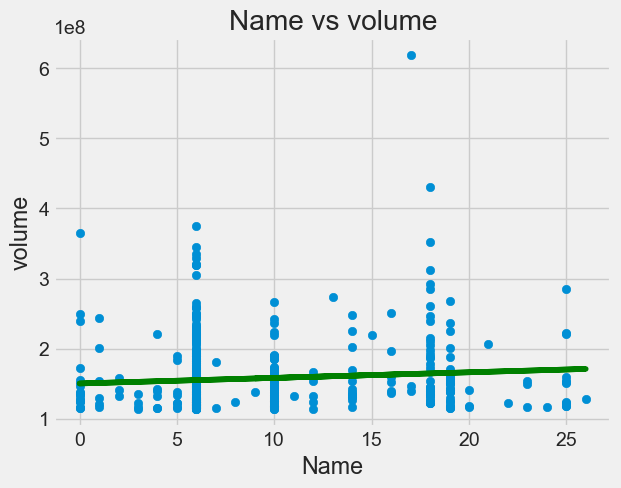

In [99]:
plt.plot(X, regr.coef_ * X + regr.intercept_, color='green')
plt.scatter(new_data.Name,new_data.volume)    
plt.title("Name vs volume")
plt.xlabel("Name")
plt.ylabel("volume")

 Plot and regression line show that there is very little or no correlation. 
    

In case someone still wants to know about the names and some other common attributes of the stocks with highest trade volumes, we can refer to point # 20 where we have seen an overview of the data, and the maximum,minimum etc. values can be seen.
For names,#21 shows the relevant data.

# # CONCLUSION:

   It can be seen from all of the above findings from our studies using scatterplots and K-Means clustering, that there is no definite relationship or dependency,between price attributes(high, low, close or open) or name attributes and trade volume of the stocks. Although with every run of the program, a different set of clusters are formed, but a general trend that emerges everytime is that the price and the name atributes showed no, or very little correlation with high trade volume. This was further confirmed by our studies in linear regression, where the regression lines were almost parallel to the x-axis in each case, showing absolutely no correlation, between the variables and the volume. Therefore, it can be said with emphasis that stocks traded in high volume do not share any price attributes(high, low, close or open) or name attributes,as there is no correlation between the given attributes.
    

   --There could be several reasons for our findings. Firstly, our dataset was not a Gaussian distribution as we have seen from our histograms above. The data is already skewed as seen earlier, in spite of it being a very large dataset.Thus,the sampling may not be inclusive enough, but that seems unlikely, considering the fact that a very large number of stock names(505 in all) were involved.However, we can make a better estimate if we check the percentage of stocks studied by us, compared to those that are traded in the stock market.Secondly, it is only to be expected that a stock with 'high' price value in a certain range will have its 'low' price value in a similar range, and any effect it will have on trade volume due to sudden fluctuations would be ironed out over a period of 5 years,which is our csope of study.(Implying that our dataset being large, and gathered over a long time weeds out any possibility of correlation with trade volume). 

--From our thorough and exhaustive study of the dataset for the stocks traded in 5 years as above, with the given information in the dataset, we cannot provide any advice regarding the common attributes of highly traded stocks,except for maybe that BAC stocks are traded the most.

At our end, we can further fine tune our study by :

1) Normalizing the data
2) Changing the number of clusters, although we have tried to do our best by using the optimal k-value from Elbow-plot.
3) Changing the 'init' value of the algorithm from default to a different value.
4) Changing the number of iterations of K-Means Clustering algorithm by changing the max_iter value.
5) It remains to be explored if adding data attributes, or, variables to make it a more inclusive study can lead us to some conclusion.
6) Splitting the large dataset into 2 or more parts, based on stock prices could be a major strategy to overcome this problem, given that the prices of higher-priced stocks are expected to run within a certain range of values, as compared to lower-priced stocks, which might run their values within a different range.(As is evident from a positive correlation between pairplots of columns 'high' and 'low').
   
    Hence, segregation of stocks by splitting the dataset based on stock prices could be a major game-changer in drawing some conclusion about the factors affecting volume of a particular stock traded. In the next iteration of this project, we can split the dataset to begin with and that can be the starting point to begin a fresh analysis of the dataset.